In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\rinde\Downloads\Instacart-Basket-Analysis-11-2023\Instacart Basket Analysis 11-2023'

In [6]:
# Import dataset
df_ords_prods_big = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_big.pkl'))

MemoryError: 

In [ ]:
# Import product department index
department_index = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [ ]:
# 2 Geogrpahic segmentation

In [ ]:
# Define regions


In [ ]:
# Define West states
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [ ]:
df_ords_prods_big.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,First Name,Surnam,Gender,State,Age,dependants,family_status,income,_merge,region
0,33664,2 % Reduced Fat Milk,84,16,99999.0,183964,873,prior,3,0,...,Edward,Carr,Male,Colorado,64,3,married,290220,both,West
1,33664,2 % Reduced Fat Milk,84,16,99999.0,1851256,873,prior,4,6,...,Edward,Carr,Male,Colorado,64,3,married,290220,both,West
2,9020,Boneless Skinless Chicken Thighs,35,12,25.0,696790,873,prior,5,6,...,Edward,Carr,Male,Colorado,64,3,married,290220,both,West
3,7877,Chicken Thighs,49,12,23.0,183964,873,prior,3,0,...,Edward,Carr,Male,Colorado,64,3,married,290220,both,West
4,33464,Fresh Boneless Skinless Chicken Breasts,49,12,22.0,1744567,873,prior,2,0,...,Edward,Carr,Male,Colorado,64,3,married,290220,both,West


In [ ]:
df_ords_prods_big.loc[df_ords_prods_big["State"].isin(west_states), 'region'] = 'West' # Assign region

In [ ]:
#Midwest

In [ ]:
# Define Midwest states
mid_west_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [ ]:
df_ords_prods_big.loc[df_ords_prods_big['State'].isin(mid_west_states), 'region'] = 'Midwest' # Assign region

In [ ]:
# South

In [ ]:
# Define South states
west_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [ ]:
df_ords_prods_big.loc[df_ords_prods_big['State'].isin(west_states), 'region'] = 'South' # Assign region

In [ ]:
# Northeast#

In [ ]:
# Define Northeast states
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [ ]:
df_ords_prods_big.loc[df_ords_prods_big['State'].isin(northeast_states), 'region'] = 'Northeast' # Assign region

In [ ]:
# User count by region
df_ords_prods_big['region'].value_counts(dropna = False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [ ]:
df_ords_prods_big['spender_flag'].head()

,spender_flag
0,High_spender
1,High_spender
2,High_spender
3,High_spender
4,High_spender


In [ ]:
df_ords_prods_big.columns.tolist()

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'merge_indicator', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'First Name', 'Surnam', 'Gender', 'State', 'Age', 'dependants',
       'family_status', 'income', '_merge', 'region'],
      dtype='object')

In [ ]:
# 2.2 spending habits by region

In [36]:
# Pivot spending_flag base on region
spend_by_region = pd.crosstab(df_ords_prods_big['region'], df_ords_prods_big['spender_flag'], dropna=False).sort_values(by = 'Low_spender', ascending = False)


KeyError: 'region'

In [ ]:
spend_by_region # Spending by region

NameError: name 'spend_by_region' is not defined

In [1]:
# Pivot product price range base on region
price_region = pd.crosstab(df_ords_prods_big['product_name'], df_ords_prods_big['region'], dropna=False,margins = True, margins_name = 'total').sort_values(by = 'total', ascending = False)


NameError: name 'pd' is not defined

In [ ]:
price_region # Price rang product preferance by region

In [ ]:
# 3 Low-activty customers

In [11]:
# Define low_activity customers
df_ords_prods_big.loc[df_ords_prods_big['order_number'] < 5, 'customer_activity'] = 'low_activity customers'

# Define high_activity customers
df_ords_prods_big.loc[df_ords_prods_big['order_number'] >= 5, 'customer_activity'] = 'high_activity customer'

In [13]:
# User count base on activity level
df_ords_prods_big['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    24436791
low_activity customers     7997421
Name: count, dtype: int64

In [ ]:
#4 Customer Profiling
# Age column is delineated into three categories for analytical purposes: 'young adult' (age 18-40), 'middle age' (age 40-60), and 'senior' (age 60-81)
# Similarity, income column is stratified into four distinct tiers base on stastic percentile of the data: 'low income' (ranging from 25093-67124),
# 'lower middle class' (from 67124-96663), 'upper middle class' (96663-127961), and 'upper class' (127961-593901).
# two-dimentions are combined together to define customer profile. total 12 groups users are categorized  in customer profile.

In [ ]:
# Define age, income groups

In [15]:
# Define low-income young adult group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] >= 18) & (df_ords_prods_big['Age'] <= 40)
         & (df_ords_prods_big['income'] >= 25903) & (df_ords_prods_big['income'] <= 67124),

         'customer_profile'] = 'low-income yound adult'

In [16]:
# Define low-income mid age group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 40) & (df_ords_prods_big['Age'] <= 60)
         & (df_ords_prods_big['income'] >= 25903) & (df_ords_prods_big['income'] <= 67124),

         'customer_profile'] = 'low-income mid age'

In [17]:
# Define low-income senior group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 60) &  (df_ords_prods_big['Age'] <= 81  )
         & (df_ords_prods_big['income'] >= 25903) & (df_ords_prods_big['income'] <= 67124),

         'customer_profile'] = 'low-ncome senior'

In [18]:
# Define lower-middle-class young adult group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] >= 18) & (df_ords_prods_big['Age'] <= 40)
         & (df_ords_prods_big['income'] > 67124) & (df_ords_prods_big['income'] <= 96663),

         'customer_profile'] = 'lower-middle-class yound adult'

In [19]:
# Define loer-middle-class mid age group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 40) & (df_ords_prods_big['Age'] <= 60)
         & (df_ords_prods_big['income'] > 67124 ) & (df_ords_prods_big['income'] <= 96663 ),

         'customer_profile'] = 'lower-middle-class mid age'

In [20]:
# Define lower-middle-class seniot group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 60) &  (df_ords_prods_big['Age'] <= 81  )
         & (df_ords_prods_big['income'] > 67124 ) & (df_ords_prods_big['income'] <= 96663 ),

         'customer_profile'] = 'lower-middle-class senior'

In [21]:
# Define upper-middle-class yound adult group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] >= 18) & (df_ords_prods_big['Age'] <= 40)
         & (df_ords_prods_big['income'] > 96663 ) & (df_ords_prods_big['income'] <= 127961 ),

         'customer_profile'] = 'upper-middle-class yound adult'

In [22]:
# Define upper-middle-class mid age group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 40) & (df_ords_prods_big['Age'] <= 60)
         & (df_ords_prods_big['income'] > 96663 ) & (df_ords_prods_big['income'] <= 127961 ),

         'customer_profile'] = 'upper-middle-class mid age'

In [23]:
# Define upper-middle-class senior group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 60) &  (df_ords_prods_big['Age'] <= 81  )
         & (df_ords_prods_big['income'] > 96663 ) & (df_ords_prods_big['income'] <= 127961 ),

         'customer_profile'] = 'upper-middle-class senior'

In [24]:
# Define upper-class young adult group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] >= 18) & (df_ords_prods_big['Age'] <= 40)
         & (df_ords_prods_big['income'] > 127961 ) & (df_ords_prods_big['income'] <= 593901 ),

         'customer_profile'] = 'upper-class young adult'

In [25]:
# Define upper-class mid age group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 40) & (df_ords_prods_big['Age'] <= 60)
         & (df_ords_prods_big['income'] > 127961 ) & (df_ords_prods_big['income'] <= 593901 ),

         'customer_profile'] = 'upper-class mid age'

In [26]:
# Define upper-class senior group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 60) &  (df_ords_prods_big['Age'] <= 81  )
         & (df_ords_prods_big['income'] > 127961 ) & (df_ords_prods_big['income'] <= 593901 ),

         'customer_profile'] = 'upper-class senior'

In [ ]:
# Family status and dependant's number with profile

In [28]:
# Familiy status count by customer profile
pro_fam = pd.crosstab(df_ords_prods_big['customer_profile'], df_ords_prods_big['family_status'], dropna = False)
pro_fam

family_status,divorced/widowed,living with parents and siblings,married,single
customer_profile,,,,
low-income mid age,14355,0,1021539,321814
low-income yound adult,0,697131,3348254,1357215
low-ncome senior,339712,0,1042866,0
lower-middle-class mid age,14302,0,986551,306079
lower-middle-class senior,360822,0,1061019,0
lower-middle-class yound adult,0,735644,3306209,1323094
upper-class mid age,46209,0,2910660,944193
upper-class senior,1012196,0,3051212,0
upper-class young adult,0,17951,85328,30129


In [30]:
# Number of dependants by customer profile
cust_dependants = pd.crosstab(df_ords_prods_big['customer_profile'], df_ords_prods_big['dependants'], dropna = False)
cust_dependants

dependants,0,1,2,3
customer_profile,,,,
low-income mid age,336169,341704,327753,352082
low-income yound adult,1357215,1339435,1352872,1353078
low-ncome senior,339712,349712,351259,341895
lower-middle-class mid age,320381,337432,315267,333852
lower-middle-class senior,360822,342697,372558,345764
lower-middle-class yound adult,1323094,1354620,1339699,1347534
upper-class mid age,990402,980238,945976,984446
upper-class senior,1012196,992509,1039262,1019441
upper-class young adult,30129,33284,36253,33742


In [ ]:
# 5 Distibution of customer profile

In [31]:
# Distribution of customer profile
df_ords_prods_big['customer_profile'].value_counts()

customer_profile
low-income yound adult            5402600
lower-middle-class yound adult    5364947
upper-class senior                4063408
upper-class mid age               3901062
upper-middle-class senior         3724446
upper-middle-class mid age        3595721
lower-middle-class senior         1421841
low-ncome senior                  1382578
low-income mid age                1357708
lower-middle-class mid age        1306932
upper-middle-class yound adult     779561
upper-class young adult            133408
Name: count, dtype: int64

Text(0.5, 0, 'User Count')

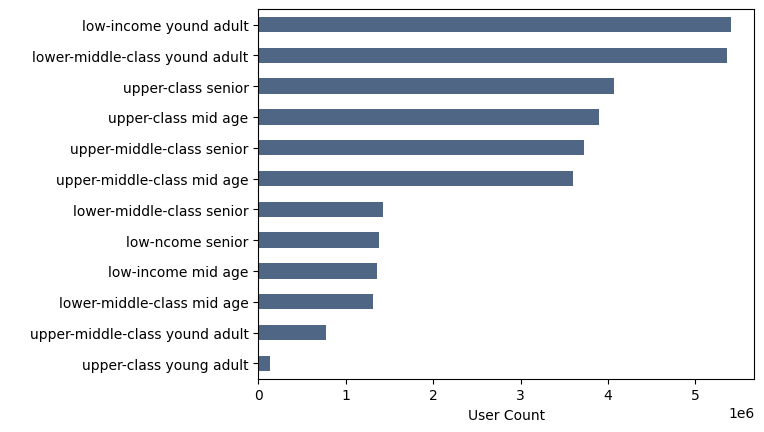

In [32]:
# Visualize the distribution of customer profile
df_ords_prods_big['customer_profile'].value_counts(dropna= False).sort_values(ascending= True).plot.barh(color='#4f6784')
plt.ylabel(' ') # Eliminate y lable
plt.xlabel('User Count')

In [ ]:
# 6 Statistics on customer-profile for order of frequency and expenditures

In [33]:
# Order frequency by customer profile
freqt_customer_profile = df_ords_prods_big.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})
freqt_customer_profile

days_since_prior_order           
                                                 mean  min   max
customer_profile                                                
low-income mid age                          11.464974  0.0  30.0
low-income yound adult                      11.211007  0.0  30.0
low-ncome senior                            11.621253  0.0  30.0
lower-middle-class mid age                  11.078025  0.0  30.0
lower-middle-class senior                   10.931313  0.0  30.0
lower-middle-class yound adult              10.996403  0.0  30.0
upper-class mid age                         11.101388  0.0  30.0
upper-class senior                          10.972695  0.0  30.0
upper-class young adult                     10.356933  0.0  30.0
upper-middle-class mid age                  11.024219  0.0  30.0
upper-middle-class senior                   11.065481  0.0  30.0
upper-middle-class yound adult              11.321622  0.0  30.0

In [34]:
# Expenditure by customer profile
price_customer_profile = df_ords_prods_big.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})
price_customer_profile

prices              
                                      mean  min      max
customer_profile                                        
low-income mid age                6.685125  1.0     25.0
low-income yound adult            7.595398  1.0     25.0
low-ncome senior                  6.704396  1.0     25.0
lower-middle-class mid age        8.644746  1.0  99999.0
lower-middle-class senior         8.315268  1.0  99999.0
lower-middle-class yound adult    8.373535  1.0  99999.0
upper-class mid age              12.834961  1.0  99999.0
upper-class senior               12.567358  1.0  99999.0
upper-class young adult         164.341222  1.0  99999.0
upper-middle-class mid age        8.558774  1.0  99999.0
upper-middle-class senior         8.450362  1.0  99999.0
upper-middle-class yound adult   12.963288  1.0  99999.0

In [ ]:
# 7 Customer analysis by region

In [ ]:
# 7.1 South

In [35]:
# Creat subset for the South region
south_customer = df_ords_prods_big[df_ords_prods_big['region']== 'South']

KeyError: 'region'

In [ ]:
# User count for the South region
south_customer['user_id'].value_counts().sum()

In [ ]:
# User count by customer profile
south_customer['customer_profile'].value_counts()

In [ ]:
# Family status count
south_customer['fam_status'].value_counts()

In [ ]:
# Number of dependant count
south_customer['dependants'].value_counts()

In [ ]:
# Total spending of the South customers
south_customer['prices'].sum()

In [ ]:
# Customer spending statistics
south_customer['prices'].describe()

In [ ]:
# Spending habbits outlook
south_customer['spending_flag'].value_counts(dropna= False)

In [ ]:
# Top 10 goods by order
south_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

In [ ]:
# The most counts of order by departments
south_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

In [ ]:
# Set data dictionary
department_index.set_index('department_id', inplace=True)
dept_dict = department_index.to_dict('index')

In [ ]:
print(dept_dict.get(4))

In [ ]:
print(dept_dict.get(16))

In [ ]:
print(dept_dict.get(19))

In [ ]:
# Produce, dairy eggs, and snacks are the top 3 popular departments for order

In [ ]:
# order Habits
# Brand loyalty check
south_customer['loyalty_flag'].value_counts(dropna= False)

In [ ]:
# Order frequency check
south_customer['frequency_flag'].value_counts(dropna= False)

In [ ]:
# The number of order check
south_customer['customer_activity'].value_counts(dropna= False)

In [ ]:
# 7.2 The West

In [ ]:
# Create subset for the West region
west_customer = df_ords_prods_big.loc[df_ords_prods_big['region'] == 'West']

In [ ]:
# User count of the West region
west_customer['user_id'].value_counts().sum()

In [ ]:
# Customer profile count
west_customer['customer_profile'].value_counts()

In [ ]:
# Marriage status count
west_customer['fam_status'].value_counts()

In [ ]:
# Number of dependant count
west_customer['dependants'].value_counts()

In [ ]:
# Total spending of the South customers
west_customer['prices'].sum()

In [ ]:
# Customer spending statistics
west_customer['prices'].describe()

In [ ]:
# Spending habbits outlook
west_customer['spending_flag'].value_counts(dropna= False)

In [ ]:
# Top 10 goods by order
west_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

In [ ]:
# The most counts of order by departments
west_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

In [ ]:
# Produce, dairy eggs, and snacks are the top 3 popular departments for order

In [ ]:
# Brand loyalty check
west_customer['loyalty_flag'].value_counts(dropna= False)

In [ ]:
# Order frequency check
west_customer['frequency_flag'].value_counts(dropna= False)

In [ ]:
# The number of order check
west_customer['customer_activity'].value_counts(dropna= False)

In [ ]:
# 7.3 The Midwest

In [ ]:
# Create subset for the Mid-west region
midwest_customer = df_ords_prods_big.loc[df_ords_prods_big['region'] == 'Midwest']

In [ ]:
# Count the number of users
midwest_customer['user_id'].value_counts().sum()

In [ ]:
# Customer profile count
midwest_customer['customer_profile'].value_counts()

In [ ]:
# Marriage status count
midwest_customer['fam_status'].value_counts()

In [ ]:
# Number of dependant count
midwest_customer['dependants'].value_counts()

In [ ]:
# Total spending of the South customers
midwest_customer['prices'].sum()

In [ ]:
# Customer spending statistics
midwest_customer['prices'].describe()

In [ ]:
# Spending habbits outlook
midwest_customer['spending_flag'].value_counts(dropna= False)

In [ ]:
# Top 10 goods by order
midwest_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

In [ ]:
# The most counts of order by departments
midwest_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

In [ ]:
# Produce, dairy eggs, and snacks are the top 3 popular departments for order

In [ ]:
# Brand loyalty check
midwest_customer['loyalty_flag'].value_counts(dropna= False)

In [ ]:
# Order frequency check
midwest_customer['frequency_flag'].value_counts(dropna= False)

In [ ]:
# The number of order check
midwest_customer['customer_activity'].value_counts(dropna= False)

In [ ]:
# 7.4 The Northeast

In [ ]:
# Create subset for the North-east region
northeast_customer = df_ords_prods_big.loc[df_ords_prods_big['region'] == 'Northeast']

In [ ]:
# Count the number of users
northeast_customer['user_id'].value_counts().sum()

In [ ]:
# Customer profile count
northeast_customer['customer_profile'].value_counts()

In [ ]:
# Marriage status count
northeast_customer['fam_status'].value_counts()

In [ ]:
# Number of dependant count
northeast_customer['dependants'].value_counts()

In [ ]:
# Total spending of the South customers
northeast_customer['prices'].sum()

In [ ]:
# Customer spending statistics
northeast_customer['prices'].describe()

In [ ]:
# Spending habbits outlook
northeast_customer['spending_flag'].value_counts(dropna= False)

In [ ]:
# Top 10 goods by order
northeast_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

In [ ]:
# The most counts of order by departments
northeast_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

In [ ]:
# Produce, dairy eggs, and snacks are the top 3 popular departments for order

In [ ]:
# Brand loyalty check
northeast_customer['loyalty_flag'].value_counts(dropna= False)

In [ ]:
# Order frequency check
northeast_customer['frequency_flag'].value_counts(dropna= False)

In [ ]:
# The number of order check
northeast_customer['customer_activity'].value_counts(dropna= False)

In [ ]:
# 8 Visualizations

In [ ]:
# Viz of the busiest day of week for order
busiest_dow = df_ords_prods_big['order_day_of_week'].plot.hist(bins = 20, color = '#4c627f')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.title('Histogram of Order Day of Week') # Chart title

In [ ]:
# Viz of the busiest hour of day for order
busiest_hod = df_ords_prods_big['order_hour_of_day'].plot.hist(bins = 24, color = '#7f95b2')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Histogram of Order Time of Day')  # Title of the bar chart

In [ ]:
# Create Sample data
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_big)) <= 0.7

# Store 70% of the sample in the data frame big
big = df_ords_prods_big[dev]
# Store 30% of the sample in the data frame small
small = df_ords_prods_big[~dev]

In [ ]:
# Create line chart with random small sample data of the dataset to discover the insight of the price of goods and the order time of the day

tod_price = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices',color = '#5f7b9f')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Trend of Product Price with Order Time')  # Title of the bar chart

In [ ]:
# Save figure
tod_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'tod_price.png'))

In [ ]:
# Create line chart with random small sample data of the dataset

dow_price = sns.lineplot(data = small, x = 'order_day_of_week',y = 'prices',color = '#5f7b9f')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.title('Trend of Product Price with Order Day')  # Title of the bar chart

In [ ]:
# Save figure
dow_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_price.png'))

In [ ]:
# Price range order count
df_ords_prods_big['price_range'].value_counts(dropna= False)

In [ ]:
# Data to plot
labels = ['Mid-range', 'Low-range', 'High-range']
sizes = [67, 31, 2]  # These values represent the percentages of each category
colors = ['#4d84a8', '#15adbb', '#f88a10']


# Plot
plt.figure(figsize=(4.5, 4.5))  # Set the size of the plot
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%',startangle=140  )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer Order Price Range')  # Title of the bar chart

# Save figure
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_product_order_count.png'))

In [ ]:
#Finding most popular products
favor_prod=df_ords_prods_big['product_name'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh(color=['#394a5f'])

plt.title('Top 10 Products for Ordering') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel(' ')  # Label for the y-axis

In [ ]:
# Finding most popular products
favor_dept=df_ords_prods_big['department_id'].value_counts(dropna=False).head(10)

In [ ]:
# Setting figure size
plt.figure(figsize=(8, 6))

#Finding most popular department
favor_dept=df_ords_prods_big['department_id'].value_counts(dropna=False).sort_values(ascending= True).plot.barh(color=['#394a5f'])

plt.title('Popular Goods Department') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel('Department ID')  # Label for the y-axis

In [ ]:
favor_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department.png'))

In [ ]:
# Create bar chart for brand loyalty user count
df_ords_prods_big['loyalty_flag'].value_counts().plot.bar(color =['#394a5f', '#5f7b9f', '#9fb0c5'])

plt.xticks(rotation=0) # x-axis lable angle
plt.title('Brand Loyalty User Distribution') # Chart title
plt.ylabel('User Count by million')  # Label for the y-axis
plt.xlabel(' ') # Label for the x-axis

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_user.png')) # Save figure

In [ ]:
# Group spending flag by loyalty flag
grouped_counts = df_ords_prods_big.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Brand Loyalty')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending.png')) # Save figure

In [ ]:
# Group frequency flag by loyalty flag
grouped_counts = df_ords_prods_big.groupby(['loyalty_flag', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Order Frequency by Brand Loyalty')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_freqt.png')) # Save figure

In [ ]:
# Group customer activity by loyalty flag
grouped_counts = df_ords_prods_big.groupby(['loyalty_flag', 'customer_activity']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Customer Activity by Loyalty Status')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_act.png')) # Save figure

In [ ]:
# Create a subset to analyze customer ordering habbits.
user_ord_hab = df_ords_prods_big[['user_id','region','age','income','product_name','department_id','fam_status','loyalty_flag','frequency_flag','price_range','spending_flag','customer_activity','customer_profile']]

In [ ]:
# Group loyalty flag by region
grouped_counts = user_ord_hab.groupby(['region', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Brand Loyalty by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_loy.png')) # Save figure

In [ ]:
# Group spending flag by region
grouped_counts = user_ord_hab.groupby(['region', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spd.png')) # Save figure

In [ ]:
# Group order frequncy by region
grouped_counts = user_ord_hab.groupby(['region', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Order Frequency by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_frqt.png')) # Save figure

In [ ]:
# Define age groups
user_ord_hab.loc[(user_ord_hab['age'] >= 18) & (user_ord_hab['age'] <= 40) ,'age_profile'] = 'young adult'
user_ord_hab.loc[(user_ord_hab['age'] > 40) & (user_ord_hab['age'] <= 60) ,'age_profile'] = 'mid-age'
user_ord_hab.loc[(user_ord_hab['age'] > 60) & (user_ord_hab['age'] <= 81) ,'age_profile'] = 'senior'

In [ ]:
# Brand Loyalty by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyal.png')) # Save figure

In [ ]:
# Spending habit by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_sped.png')) # Save figure

In [ ]:
# Order frequency by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#df5d5c','#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_freq.png')) # Save figure

In [ ]:
# Brand loyalty by famiy status

grouped_counts = user_ord_hab.groupby(['fam_status', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_loyal.png')) # Save figure

In [ ]:
# Spending habbits by famiy status

grouped_counts = user_ord_hab.groupby(['fam_status', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#df5d5c','#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_sped.png')) # Save figure

In [ ]:
# Order frequency by famiy status

grouped_counts = user_ord_hab.groupby(['fam_status', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_freq.png')) # Save figure

In [ ]:
# Define income groups
user_ord_hab.loc[(user_ord_hab['income'] < 62636) ,'income_profile'] = 'low-income'
user_ord_hab.loc[(user_ord_hab['income'] >=62636) & (user_ord_hab['income'] < 95450) ,'income_profile'] = 'lower-middle-class'
user_ord_hab.loc[(user_ord_hab['income'] >= 95450) & (user_ord_hab['income'] < 133392) ,'income_profile'] = 'upper-middle-class'
user_ord_hab.loc[(user_ord_hab['income'] >= 133392) ,'income_profile'] = 'upper-class'

In [ ]:
# Brand loyalty by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_loyal.png')) # Save figure

In [ ]:
# Spending habbits by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8',  '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_sped.png')) # Save figure

In [ ]:
# Order frequency by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_freq.png')) # Save figure

In [ ]:
# Define target segment
Target_segment = user_ord_hab.loc[
    (user_ord_hab['age_profile'] == 'young adult') &
    ((user_ord_hab['income_profile'] == 'upper-middle-class') | (user_ord_hab['income_profile'] == 'lower-middle-class')) &
    (user_ord_hab['fam_status'] == 'married')
]

In [ ]:
# The popular departments for the target segment
Target_segment['department_id'].value_counts().sort_values(ascending= False ).head(5).plot(kind='bar', color=['#403990', '#80a6e2', '#fbdd85','#f46f43','#cf3d3e'])
plt.xticks(rotation=0)


# Add labels and title
plt.xlabel('Department ID ')
plt.title('Favorite Departments for Target Segment')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'faovr_dept_target.png')) # Save figure

In [ ]:
# Group price range order by customer profile
grouped_counts = user_ord_hab.groupby(['customer_profile', 'price_range']).size().unstack().sort_values(by= 'High-range product', ascending = False)

# Plot in to chart
grouped_counts.plot(kind='barh', color = ['#4d84a8','#15adbb','#f88a10'])

# Add labels and title
plt.ylabel(' ')
plt.title('Price Range by Customer Profile')
plt.legend(title =None)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_cus_pro.png')) # Save figure

In [ ]:
# Group price range order by customer profile
grouped_counts = user_ord_hab.groupby(['customer_profile', 'frequency_flag']).size().unstack()

# Plot in to chart
grouped_counts.plot(kind='barh', color = ['#4d84a8','#15adbb','#f88a10'])

# Add labels and title
plt.ylabel(' ')
plt.title('Order Freqency by Customer Profile')
plt.legend(title =None)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freqt_cus_pro.png')) # Save figure

In [ ]:
# Group customer profile by department id
grouped_counts = user_ord_hab.groupby(['department_id', 'customer_profile']).size().unstack()

# Plot in to chart
grouped_counts.plot(kind='bar')

# Add label and title
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xlabel('Department ID')
plt.title('Popular Department by Customer Profile')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prod_cust.png')) # Save figure